In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar

import os

In [45]:
df = pd.read_csv("https://drive.usercontent.google.com/download?id=1IHoX1RiKXY4FjJqJiDx5ZyxCfUG1R2u6&export=download&authuser=0")

In [46]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [47]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [48]:
df.tail()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [49]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [50]:
df[df["END_DATE*"].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [51]:
df.drop(df[df['END_DATE*'].isna()].index, axis=0, inplace=True)


In [52]:
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [54]:
df.drop(["PURPOSE*"],axis= 1,inplace = True)
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0


In [55]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [56]:
df.drop(df[df.duplicated()].index,axis= 0,inplace =True)

In [57]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


In [60]:
df['START_DATE'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')


print(df)

           START_DATE*         END_DATE* CATEGORY*            START*  \
0       1/1/2016 21:11    1/1/2016 21:17  Business       Fort Pierce   
1        1/2/2016 1:25     1/2/2016 1:37  Business       Fort Pierce   
2       1/2/2016 20:25    1/2/2016 20:38  Business       Fort Pierce   
3       1/5/2016 17:31    1/5/2016 17:45  Business       Fort Pierce   
4       1/6/2016 14:42    1/6/2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1150   12/31/2016 1:07   12/31/2016 1:14  Business           Kar?chi   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   

                 STOP*  MILES*          START_DATE            END_DATE  
0          Fort Pierce     5.1 2016-01-01 21:11:00 2016-01-01 

In [61]:
# analysis part (EDA)

In [62]:
df["CATEGORY*"].unique()

array(['Business', 'Personal'], dtype=object)

In [67]:
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles= ('MILES*','sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Miles per Catregory')

<Figure size 640x480 with 0 Axes>

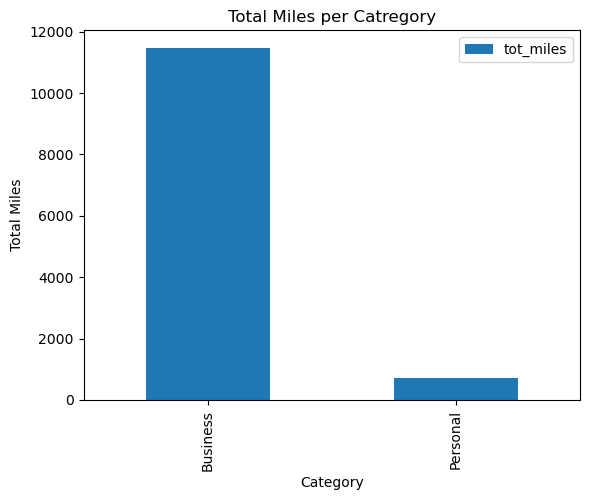

In [72]:
plt.figure()
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles = ('MILES*','sum')).plot(kind ='bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total Miles per Catregory')

In [74]:
len(df['START*'].unique())

177

In [77]:
df['START*'].value_counts(ascending= False)[:10]

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: title={'center': 'top 10 pickup places'}, xlabel='pickup_count', ylabel='Places'>

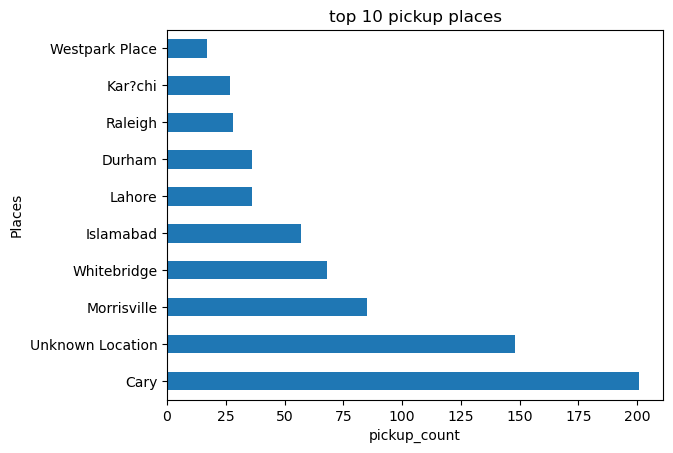

In [80]:
df['START*'].value_counts(ascending= False)[:10].plot(kind='barh',ylabel= 'Places',xlabel ="pickup_count",title = 'top 10 pickup places')

In [81]:
df['STOP*'].value_counts(ascending= False)[:10]

STOP*
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

<Axes: title={'center': 'top 10 pickup places'}, xlabel='pickup_count', ylabel='Places'>

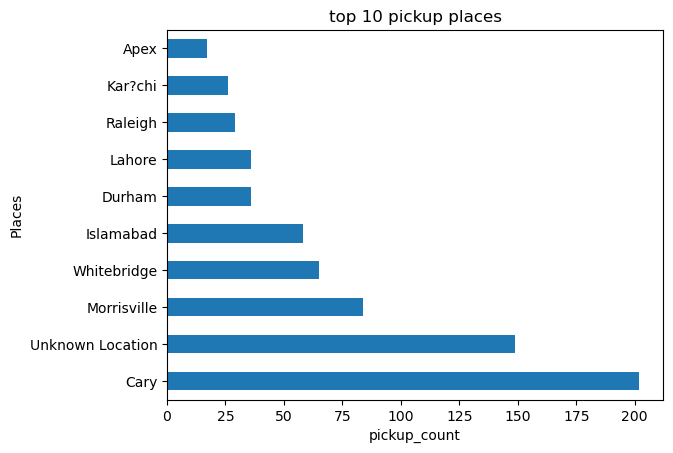

In [82]:
df['STOP*'].value_counts(ascending= False)[:10].plot(kind='barh',ylabel= 'Places',xlabel ="pickup_count",title = 'top 10 pickup places')

In [85]:
df[df['START*']=='Unknown Location']['START*'].value_counts()

START*
Unknown Location    148
Name: count, dtype: int64

In [86]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
MILES*,1154.0,10.567418,0.5,2.9,6.0,10.4,310.3,21.588452
START_DATE,1154,2016-07-17 00:07:01.611784960,2016-01-01 21:11:00,2016-03-31 20:23:30,2016-07-21 17:29:30,2016-10-27 21:16:15,2016-12-31 22:08:00,NaN
END_DATE,1154,2016-07-17 00:30:16.117850880,2016-01-01 21:17:00,2016-03-31 20:52:00,2016-07-21 17:37:00,2016-10-27 21:34:30,2016-12-31 23:51:00,NaN


In [87]:
#multivarient analysis

In [88]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,START_DATE,END_DATE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,2016-01-01 21:11:00,2016-01-01 21:17:00
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,2016-01-02 01:25:00,2016-01-02 01:37:00
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,2016-01-02 20:25:00,2016-01-02 20:38:00
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,2016-01-05 17:31:00,2016-01-05 17:45:00
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,2016-01-06 14:42:00,2016-01-06 15:49:00


In [92]:

df.groupby(['START*', 'STOP*'])['MILES*'].apply(print)


910    2.2
Name: (Agnew, Agnew), dtype: float64
906    4.3
Name: (Agnew, Cory), dtype: float64
908    2.2
911    2.4
Name: (Agnew, Renaissance), dtype: float64
879    15.2
Name: (Almond, Bryson City), dtype: float64
646    1.0
825    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
565     5.5
616     4.6
647     6.0
826     5.3
978     5.4
1014    5.3
1033    8.8
1045    4.7
Name: (Apex, Cary), dtype: float64
855    2.2
Name: (Apex, Eagle Rock), dtype: float64
1001    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
621    4.9
Name: (Arlington, Washington), dtype: float64
613    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
881    195.9
Name: (Asheville, Mebane), dtype: float64
871    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
547     8.3
548     3.2
551     4.5
556    13.0
557     4.4
Name: (Banne

START*         STOP*             
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES*, Length: 363, dtype: object

In [95]:
df.groupby(['START*', 'STOP*'])['MILES*'].sum().sort_values(ascending = False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

In [96]:
#checking for round trip

<Axes: xlabel='ROUND_TRIP*', ylabel='count'>

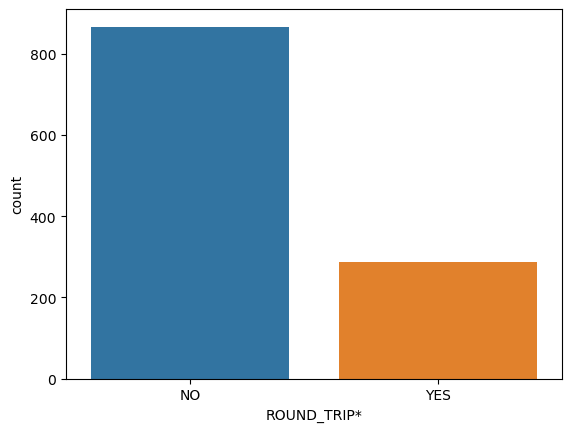

In [104]:
def is_roundtrip(df):
    if df['START*']==df['STOP*']:
      return 'YES'
    else:
      return 'NO'

df['ROUND_TRIP*']= df.apply(is_roundtrip,axis= 1)

sns.countplot(x='ROUND_TRIP*', data=df, order=df['ROUND_TRIP*'].value_counts().index)

In [105]:
df['ROUND_TRIP*'].value_counts()

ROUND_TRIP*
NO     866
YES    288
Name: count, dtype: int64